In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [30]:
df = pd.read_csv("AirQualityData.csv")
df.head()

,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
0,2024-01-01,00:00,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,...,209.984267,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0
1,2024-01-01,01:00,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,...,319.534890,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1
2,2024-01-01,02:00,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,...,274.644300,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2
3,2024-01-01,03:00,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,...,312.266023,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3
4,2024-01-01,04:00,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,...,21.392120,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4


In [31]:
df.isnull().sum()

Date                   0
Time                   0
CO(GT)                 0
NOx(GT)                0
NO2(GT)                0
O3(GT)                 0
SO2(GT)                0
PM2.5                  0
PM10                   0
Temperature            0
Humidity               0
Pressure               0
WindSpeed              0
WindDirection          0
CO_NOx_Ratio           0
NOx_NO2_Ratio          0
Temp_Humidity_Index    0
AirQualityIndex        0
CO_MA3                 0
NO2_MA3                0
O3_MA3                 0
DayOfWeek              0
Hour                   0
dtype: int64

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("Datetime", inplace=True)
df.drop(columns=["Date", "Time"], inplace=True)

In [34]:
df.head()

,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,Humidity,Pressure,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,12.399195,1041.659237,...,209.984267,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0
2024-01-01 01:00:00,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,10.716451,1045.021361,...,319.534890,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1
2024-01-01 02:00:00,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,30.193792,950.441013,...,274.644300,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2
2024-01-01 03:00:00,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,81.938885,981.707503,...,312.266023,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3
2024-01-01 04:00:00,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,91.427289,1033.737803,...,21.392120,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4


In [35]:
df.describe()

,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,Humidity,Pressure,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,5.025385,148.126633,100.213189,89.914815,26.081045,104.765999,153.591417,17.305228,54.626284,999.862679,...,179.571724,0.082564,3.412176,9.418823,249.602455,5.025846,100.222672,89.901700,2.978000,11.484000
std,2.874632,85.999247,57.074947,52.003484,14.059684,56.344868,83.080911,12.943632,25.844003,28.897118,...,104.738760,0.215593,7.996062,8.982090,143.570929,1.672715,32.884870,30.505331,1.992614,6.919951
min,0.100115,1.009185,1.010513,1.055442,1.012370,5.009384,10.031967,-4.996963,10.000498,950.018004,...,0.033694,0.000389,0.006021,-4.824570,0.052355,0.612983,3.702628,7.453898,0.000000,0.000000
25%,2.514242,73.636615,51.326622,44.179487,14.220565,56.544378,82.200105,6.092531,31.970628,975.018939,...,86.409827,0.017033,0.719052,2.551932,124.521801,3.846779,77.100651,68.321846,1.000000,5.000000
50%,5.054973,146.440690,99.508855,88.956924,26.321359,105.502686,154.714484,17.184773,55.113650,999.857722,...,179.401393,0.034021,1.467460,6.975287,250.552671,5.042259,100.128466,90.452301,3.000000,11.000000
75%,7.524652,221.823697,149.666167,136.333683,37.833728,153.751364,222.969347,28.573093,76.311009,1024.763352,...,272.370032,0.065973,2.789423,14.752847,370.997732,6.206658,123.919621,111.337587,5.000000,17.000000
max,9.997205,299.838744,199.934968,179.986544,49.993700,199.980691,299.911727,39.987944,99.981043,1049.926869,...,359.984504,4.078615,131.169948,39.372679,499.920650,9.471079,190.781333,173.546840,6.000000,23.000000


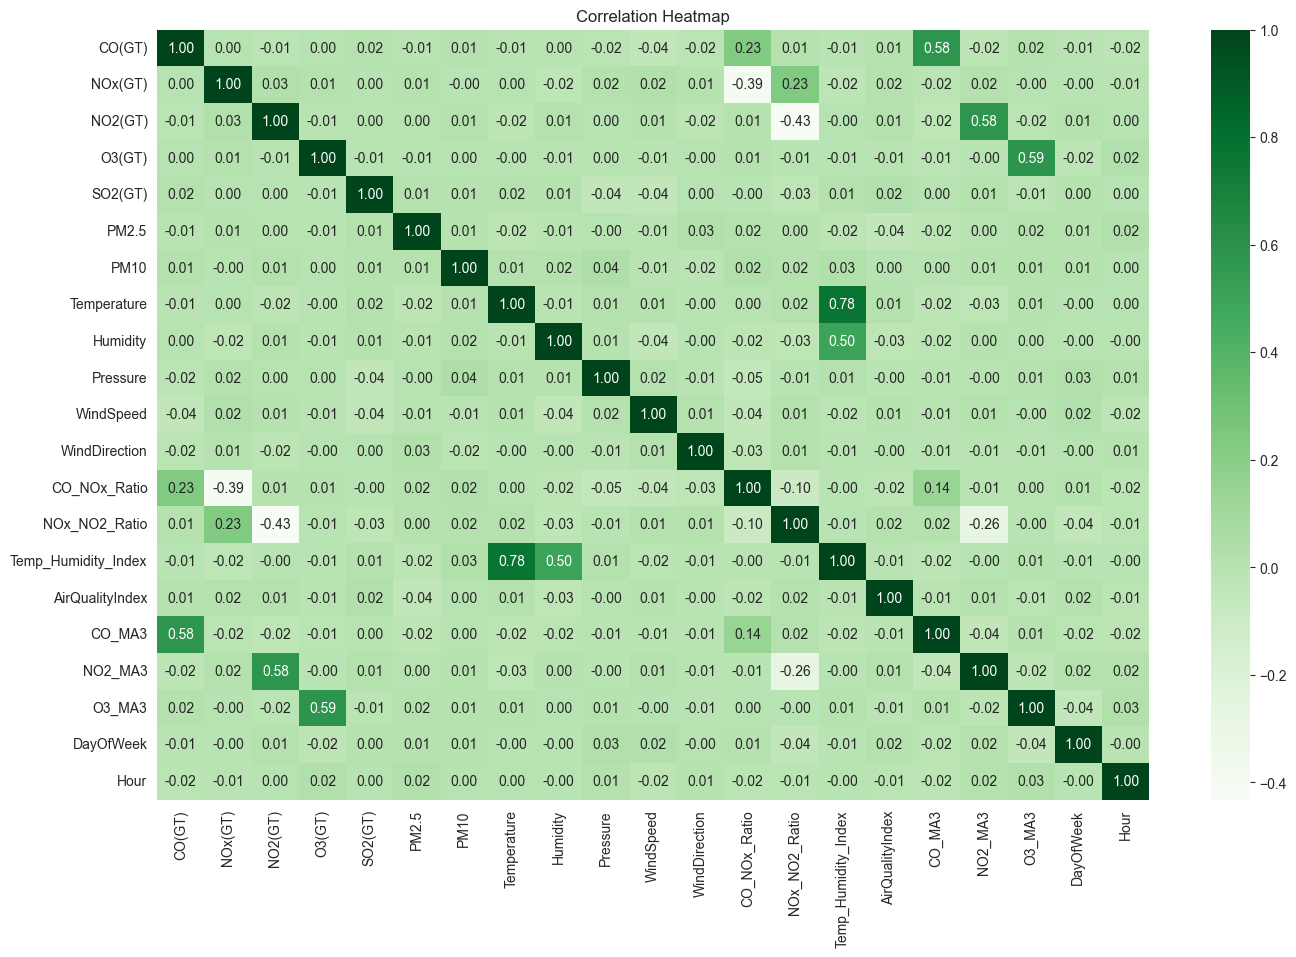

In [36]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

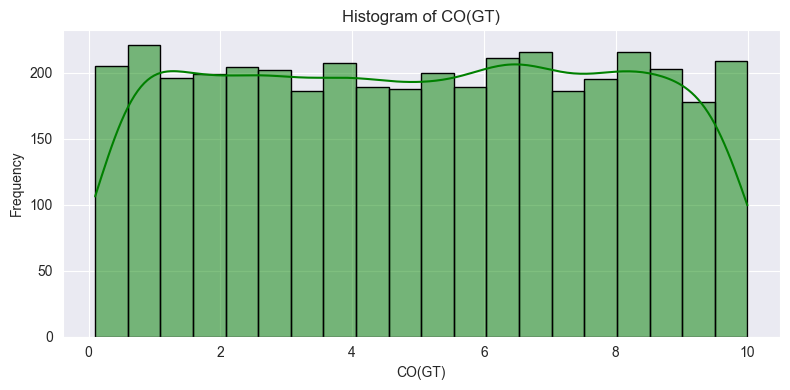

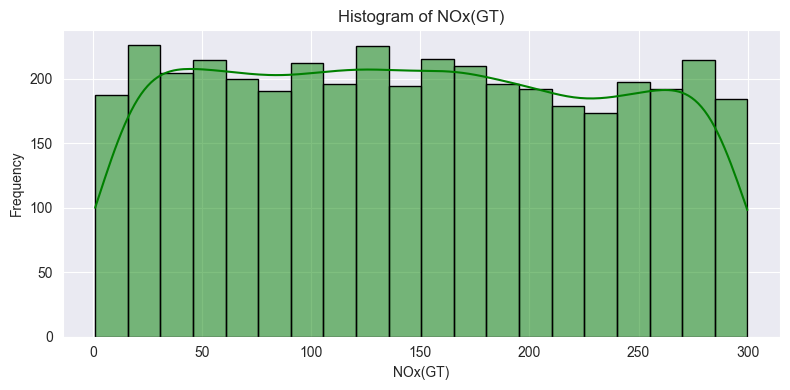

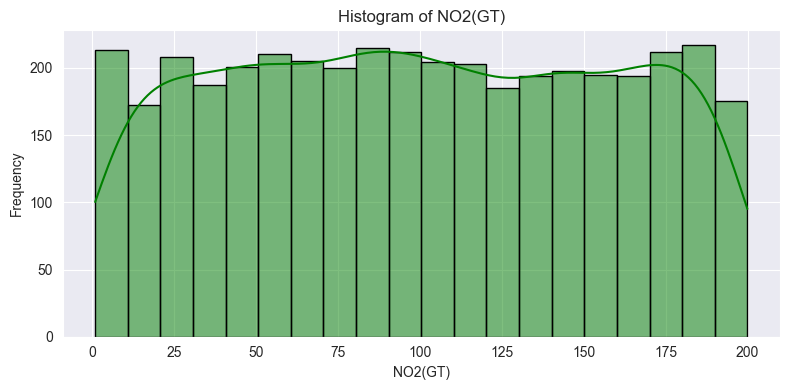

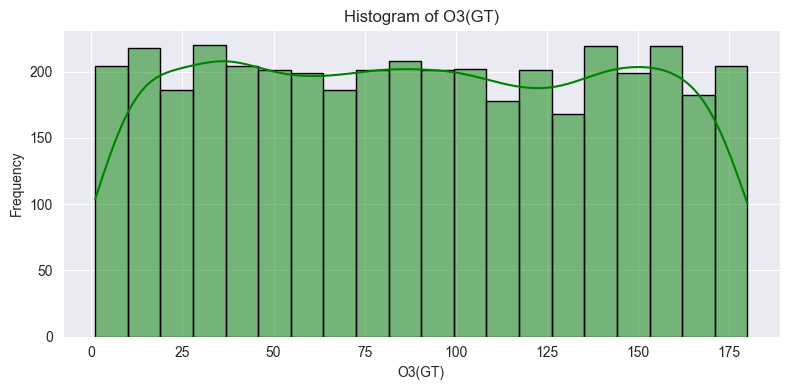

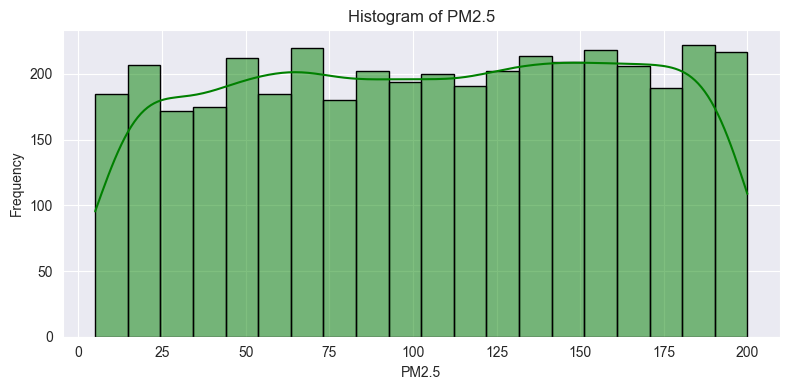

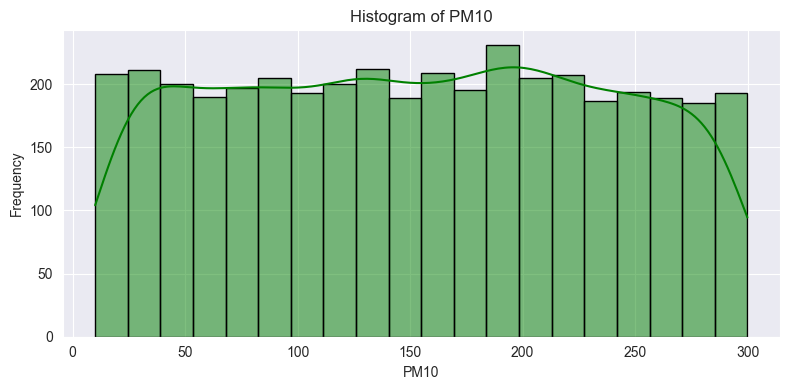

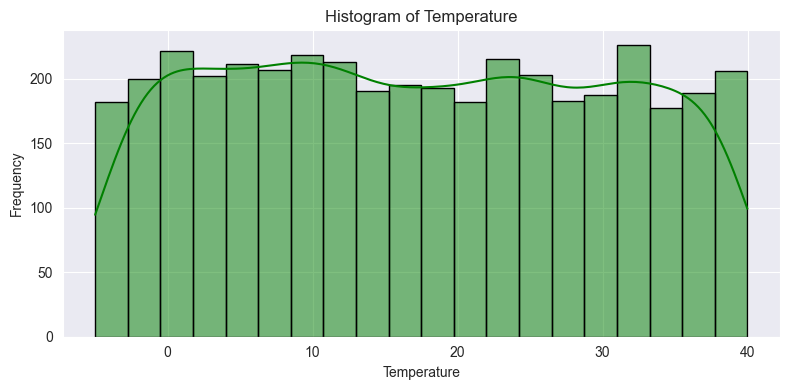

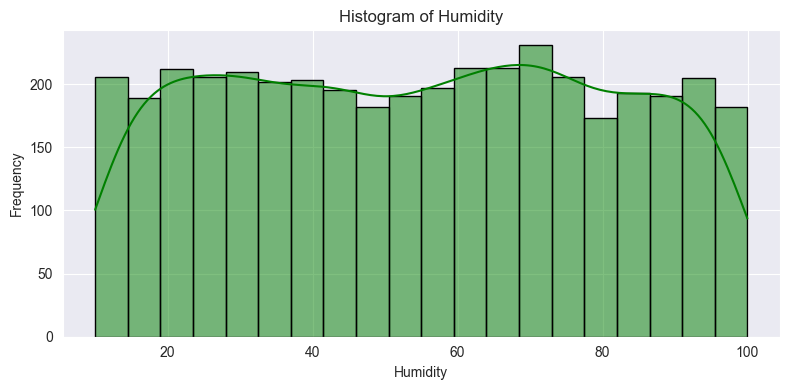

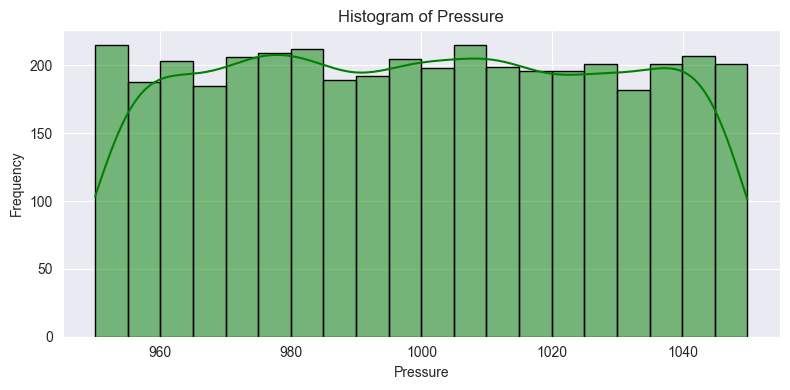

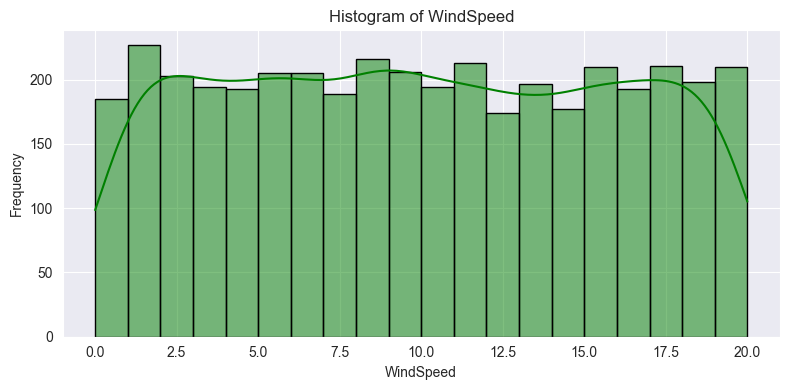

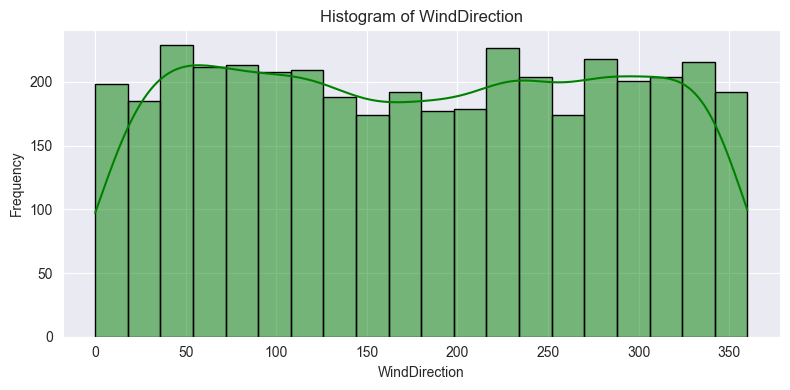

In [41]:
numeric_columns = ["CO(GT)", "NOx(GT)", "NO2(GT)", "O3(GT)", "PM2.5", "PM10", "Temperature", "Humidity", "Pressure", "WindSpeed", "WindDirection"]
for column in numeric_columns:
    if column in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], bins=20, color="green", edgecolor="black", kde=True)
        plt.title(f"Histogram of {column}")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

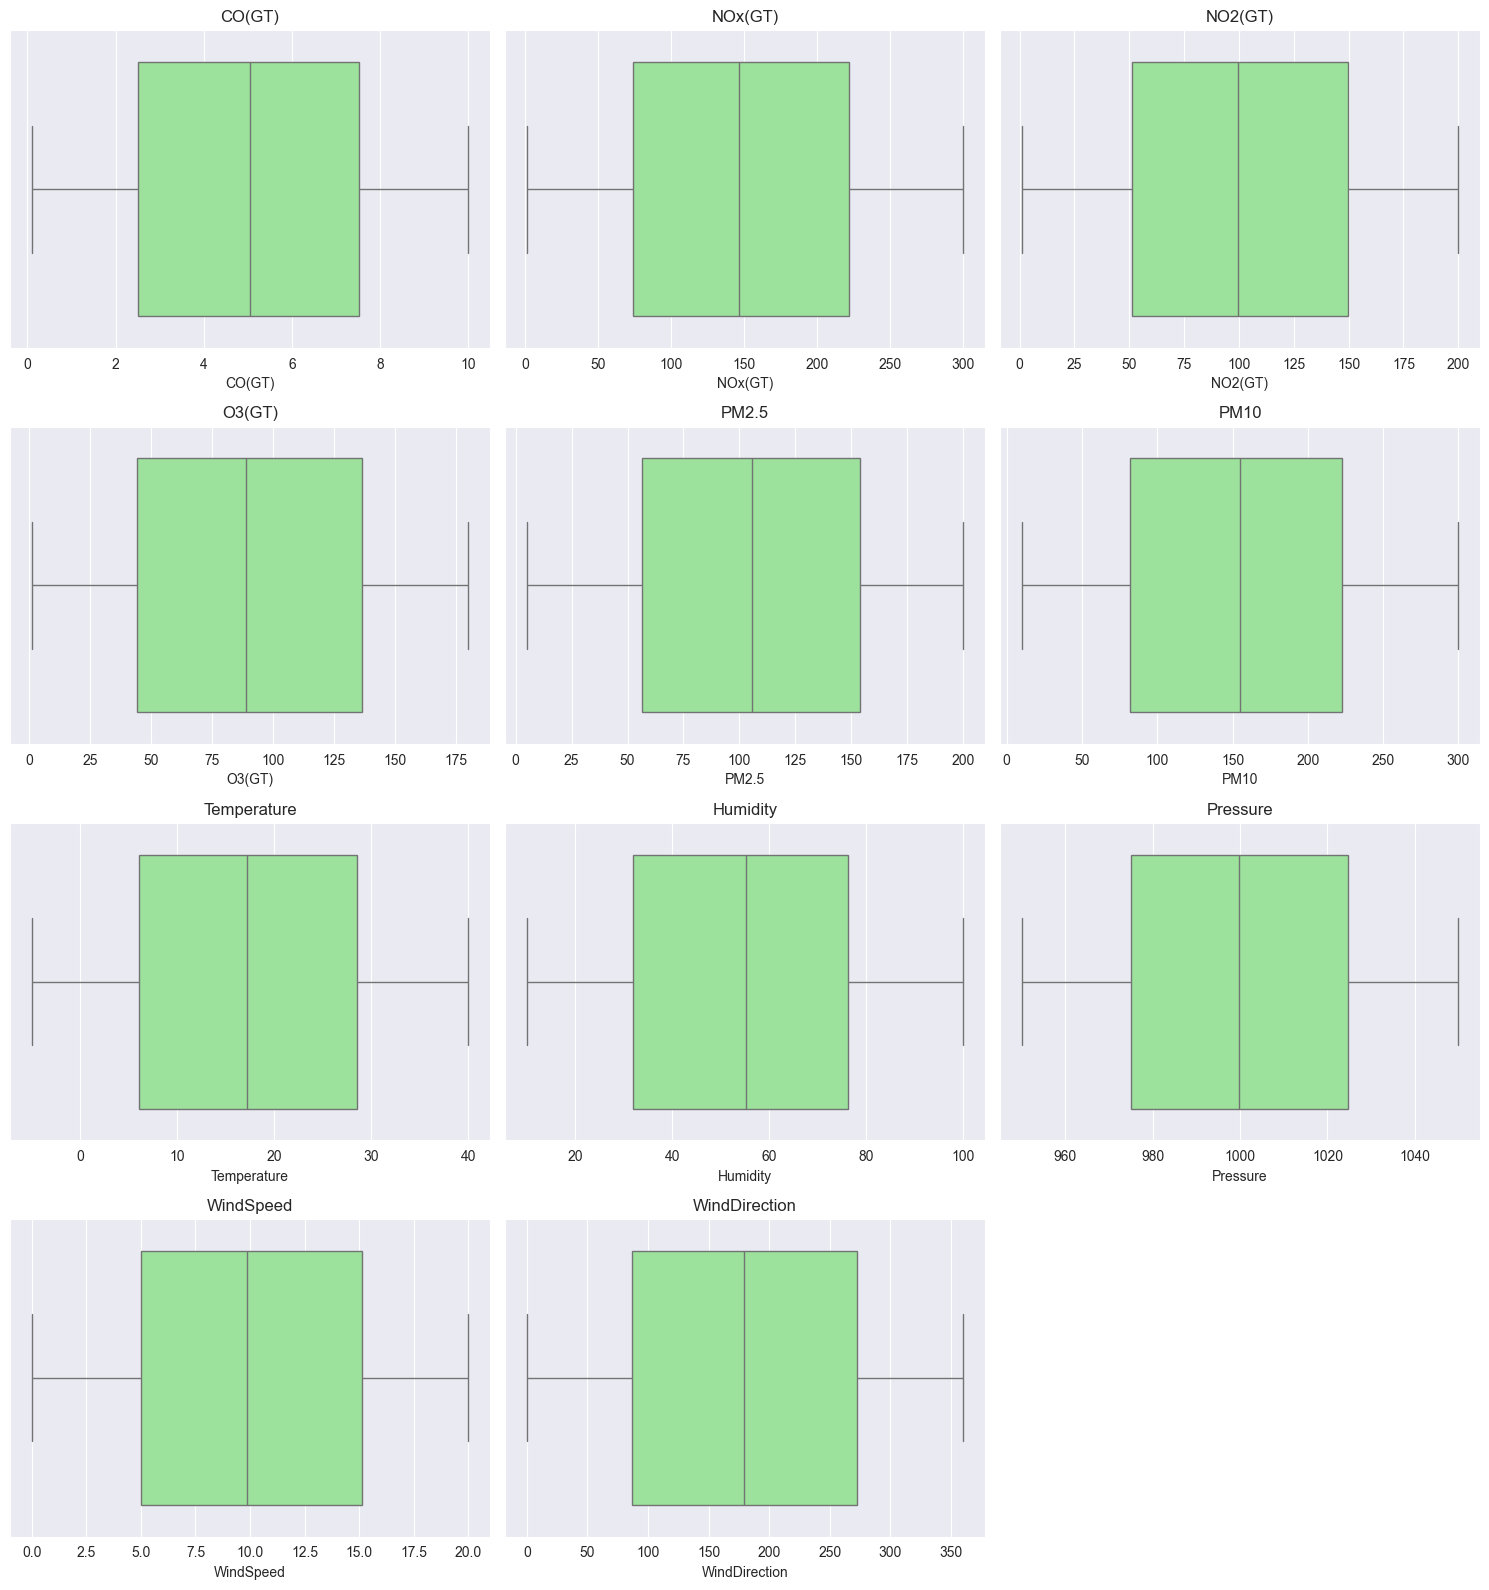

In [47]:
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)
plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(col)

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Mean concentration')

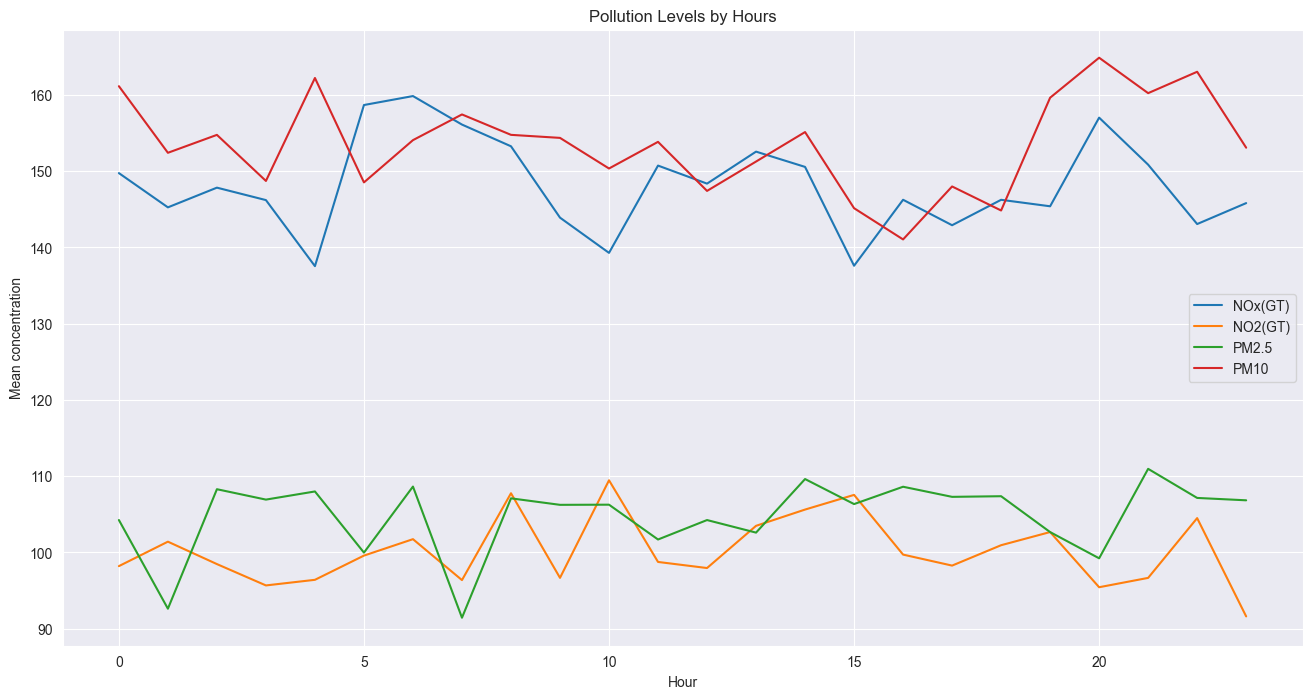

In [12]:
pollutants = ['NOx(GT)', 'NO2(GT)', 'PM2.5', 'PM10']
average_by_hour = df.groupby("Hour")[pollutants].mean()
plt.figure(figsize=(16, 8))
for pollutant in pollutants:
    plt.plot(average_by_hour.index, average_by_hour[pollutant], label=pollutant)
plt.title("Pollution Levels by Hours")
plt.legend()
plt.xlabel("Hour")
plt.ylabel("Mean concentration")

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [14]:
X = df.drop(columns="AirQualityIndex")
Y = df["AirQualityIndex"]

In [15]:
scaler = StandardScaler()
X_standarized = scaler.fit_transform(X)
X = X_standarized

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)